In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 5
CHANNELS = 3 

In [ ]:
dataset_b = tf.keras.preprocessing.image_dataset_from_directory('/content/B',
                                                    shuffle=True,
                                                    image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size = BATCH_SIZE)

Found 100 files belonging to 3 classes.


In [ ]:
class_names = dataset_b.class_names

In [ ]:
len(dataset_b)


#100/batch size

20

In [ ]:
for image_batch, label_batch in dataset_b:
  print(label_batch)

tf.Tensor([1 1 2 2 2], shape=(5,), dtype=int32)
tf.Tensor([1 1 2 2 2], shape=(5,), dtype=int32)
tf.Tensor([2 2 2 2 1], shape=(5,), dtype=int32)
tf.Tensor([1 2 1 1 2], shape=(5,), dtype=int32)
tf.Tensor([1 2 1 2 2], shape=(5,), dtype=int32)
tf.Tensor([2 1 2 1 2], shape=(5,), dtype=int32)
tf.Tensor([2 2 2 2 2], shape=(5,), dtype=int32)
tf.Tensor([2 2 1 1 2], shape=(5,), dtype=int32)
tf.Tensor([1 1 2 1 1], shape=(5,), dtype=int32)
tf.Tensor([2 1 2 2 1], shape=(5,), dtype=int32)
tf.Tensor([1 2 2 1 1], shape=(5,), dtype=int32)
tf.Tensor([2 1 1 1 1], shape=(5,), dtype=int32)
tf.Tensor([1 2 2 2 1], shape=(5,), dtype=int32)
tf.Tensor([2 1 1 2 2], shape=(5,), dtype=int32)
tf.Tensor([1 2 1 1 1], shape=(5,), dtype=int32)
tf.Tensor([2 1 1 1 2], shape=(5,), dtype=int32)
tf.Tensor([1 1 2 2 1], shape=(5,), dtype=int32)
tf.Tensor([2 1 1 2 1], shape=(5,), dtype=int32)
tf.Tensor([1 2 1 1 1], shape=(5,), dtype=int32)
tf.Tensor([1 1 2 2 2], shape=(5,), dtype=int32)


In [ ]:
for image_batch, label_batch in dataset_b.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(5, 256, 256, 3)
[1 2 2 2 2]


In [ ]:
#print the image 1 data into numpy
for image_batch, label_batch in dataset_b.take(1):
  print(image_batch[0].numpy())


[[[ 88.        82.        50.      ]
  [ 89.34375   81.328125  50.      ]
  [ 90.90625   81.        49.546875]
  ...
  [ 84.        38.        23.90625 ]
  [ 84.328125  38.328125  23.      ]
  [ 85.        39.        23.      ]]

 [[ 85.3125    79.3125    47.3125  ]
  [ 88.0105    81.34912   48.666748]
  [ 90.84326   82.03931   49.483887]
  ...
  [ 83.328125  37.328125  23.234375]
  [ 83.43579   37.43579   22.107666]
  [ 83.65625   37.65625   21.65625 ]]

 [[ 84.453125  79.359375  46.      ]
  [ 87.50806   81.80542   48.015625]
  [ 90.401855  82.7522    48.83716 ]
  ...
  [ 83.        37.        22.90625 ]
  [ 82.85132   36.85132   21.671875]
  [ 82.546875  36.546875  21.      ]]

 ...

 [[ 19.546875 104.09375   66.453125]
  [ 18.875    103.72632   65.17236 ]
  [ 19.90625  103.546875  65.      ]
  ...
  [133.02466   95.17871   64.83716 ]
  [135.94653   98.30591   66.85278 ]
  [138.8125   101.171875  69.71875 ]]

 [[ 20.65625  105.65625   66.      ]
  [ 19.763916 104.763916  65.107666]


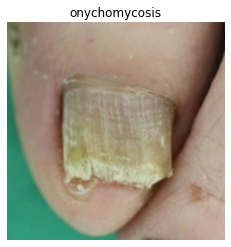

In [ ]:
#print the image 1 data into numpy
for image_batch, label_batch in dataset_b.take(1):
  plt.imshow(image_batch[0].numpy().astype('uint8'))
  plt.title(class_names[label_batch[0]])
  plt.axis("off")


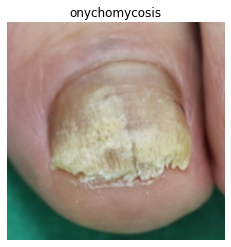

In [ ]:
#print the image 1 data into numpy
for image_batch, label_batch in dataset_b.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

In [ ]:
train_size = 0.8
len(dataset_b)*train_size

16.0

In [ ]:
train_ds = dataset_b.take(4)
len(train_ds)

4

In [ ]:
test_ds = dataset_b.skip(4) #slicing
len(test_ds)

16

In [ ]:
val_size = 0.1
len(dataset_b)*val_size


2.0

In [ ]:
val_ds = test_ds.take(1)
len(val_ds)

1

In [ ]:
# test_ds = test_ds.skip(1)
# len(test_ds)

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size,seed=2)

  train_size = int(train_split * ds_size)
  val_size = int(val_split* ds_size)

  train_ds =  ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset_b)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
                    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
                    layers.experimental.preprocessing.Rescaling(1.0/255)
                    ])


In [ ]:
data_augmentation = tf.keras.Sequential([
                                         layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                                         layers.experimental.preprocessing.RandomRotation(0.2)
                                         ])

In [ ]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
                           resize_and_rescale,
                           data_augmentation,
                           layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Flatten(),
                           layers.Dense(64, activation='relu'),
                           layers.Dense(3, activation='softmax')
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (5, 256, 256, 3)          0         
                                                                 
 sequential_1 (Sequential)   (5, 256, 256, 3)          0         
                                                                 
 conv2d (Conv2D)             (5, 254, 254, 32)         896       
                                                                 
 max_pooling2d (MaxPooling2D  (5, 127, 127, 32)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (5, 125, 125, 64)         18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (5, 62, 62, 64)          0         
 2D)                                                  

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
import numpy as np

train_images = np.concatenate([x for x , y in train_ds], axis=0)
train_labels = np.concatenate([y for x, y in train_ds], axis=0)

val_images = np.concatenate([x for x, y in val_ds], axis=0)
val_labels = np.concatenate([y for x, y in val_ds], axis=0)

In [ ]:
history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(val_images, val_labels))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 13s 4s/step - loss: 0.9854 - accuracy: 0.2375 - val_loss: 0.8182 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 10s 3s/step - loss: 0.7580 - accuracy: 0.4500 - val_loss: 0.7891 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 10s 3s/step - loss: 0.7806 - accuracy: 0.4750 - val_loss: 0.7074 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 10s 3s/step - loss: 0.7205 - accuracy: 0.5000 - val_loss: 0.7483 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 9s 3s/step - loss: 0.7392 - accuracy: 0.5250 - val_loss: 0.7408 - val_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 10s 3s/step - loss: 0.7207 - accuracy: 0.5250 - val_loss: 0.7112 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 10s 3s/step - loss: 0.7170 - accuracy: 0.4250 - val_loss: 0.7092 - val_accuracy: 0.5000
Epoch 8/50
3/3 [==============================

In [ ]:
model.evaluate(test_ds)

2/2 [==============================] - 1s 181ms/step - loss: 0.8491 - accuracy: 0.4000


[0.8490899801254272, 0.4000000059604645]

In [ ]:
history.params

{'epochs': 50, 'steps': 3, 'verbose': 1}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9854186773300171,
 0.7580033540725708,
 0.780605673789978,
 0.7204951047897339,
 0.7392017245292664]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

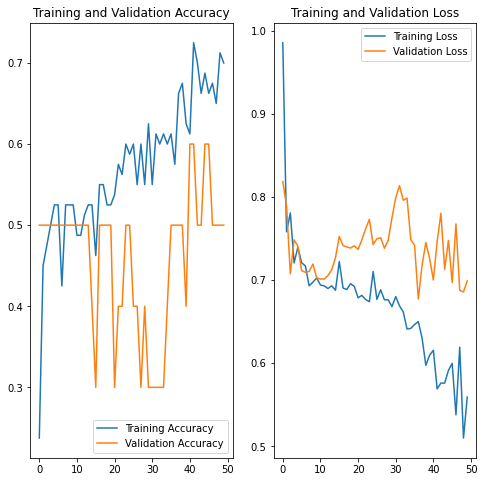

In [ ]:
EPOCHS = 50
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: naildystrophy
predicted label: naildystrophy


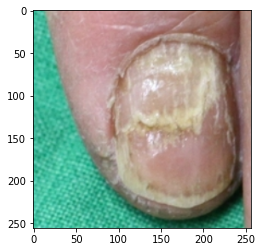

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

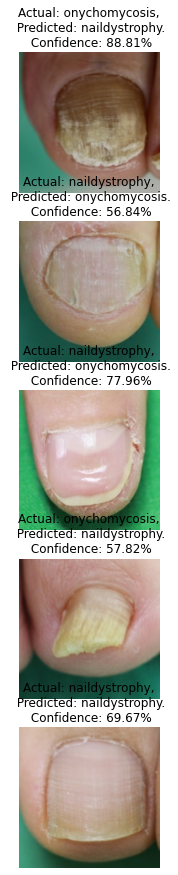

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(5):
        ax = plt.subplot(5, 1, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")